## Observations and Insights 

In [1549]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [1550]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1551]:
# Checking the number of mice.
total_mice = mouse_study_data["Mouse ID"].nunique()
total_mice

249

In [1552]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID.all()


'g989'

In [1553]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study_data.loc[mouse_study_data["Mouse ID"].isin(duplicate_mice_ID), :]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1554]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data_clean = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mice_ID)==False]
mouse_study_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1555]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned_data = mouse_study_data_clean["Mouse ID"].nunique()
total_mice_cleaned_data

248

## Summary Statistics

In [1556]:
# summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
byRegimen = mouse_study_data_clean.groupby('Drug Regimen')

mean_vol = byRegimen['Tumour Volume (mm3)'].mean()
median_vol = byRegimen['Tumour Volume (mm3)'].median()
var_vol = byRegimen['Tumour Volume (mm3)'].var()
std_vol = byRegimen['Tumour Volume (mm3)'].std()
sem_vol = byRegimen['Tumour Volume (mm3)'].sem()

summary_table = pd.DataFrame({'Tumor Volume Mean': mean_vol,
                              'Tumor Volume Median': median_vol,
                              'Tumor Volume Variance': var_vol,
                              'Tumor Volume StanDev': std_vol,
                              'Tumor Volume StanError': sem_vol})

summary_table = summary_table.applymap('{:.2f}'.format)

summary_table



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StanDev,Tumor Volume StanError
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [1557]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_data_summary_agg =  mouse_study_data_clean.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_study_data_summary_agg


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

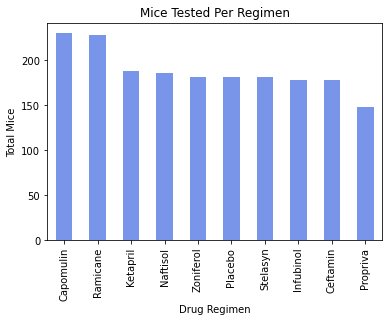

In [1558]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_data_regimen = mouse_study_data_clean["Drug Regimen"].value_counts()

bar_plot = mice_data_regimen.plot.bar(title='Mice Tested Per Regimen',alpha=.70, color='royalblue')
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Total Mice")


Text(0.5, 1.0, 'Mice Tested Per Regimen')

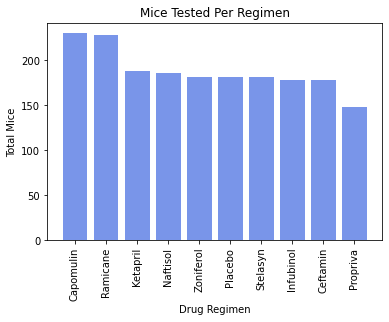

In [1559]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# bar plot showing number of data points for each treatment regimen using pyplot
x_axis = mice_data_regimen.index.values
y_axis = mice_data_regimen.values

plt.bar(x_axis, y_axis, color = 'royalblue', alpha=.70, align = "center")
reg = list(mice_data_regimen.index.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.xticks(rotation="vertical")
plt.title('Mice Tested Per Regimen')

<AxesSubplot:title={'center':'Count of Female vs. Male Mice'}, ylabel='Sex'>

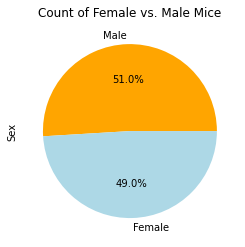

In [1560]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex_type_data = mouse_study_data_clean['Sex'].value_counts()

mouse_sex_type_data.plot.pie(title='Count of Female vs. Male Mice', colors=['orange','lightblue'], autopct="%1.1f%%")

Text(0.5, 1.0, 'Count of Female vs. Male Mice')

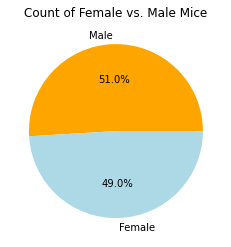

In [1561]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_types = ['Male', 'Female']

plt.pie(mouse_sex_type_data, labels=sex_types, colors=['orange','lightblue'], autopct="%1.1f%%")
plt.title('Count of Female vs. Male Mice')


## Quartiles, Outliers and Boxplots

In [1562]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for regimen in regimens:
    regimen_data = mouse_study_data_clean.loc[mouse_study_data_clean["Drug Regimen"] == regimen,:]
    regimen_data_max_timepoint = regimen_data.groupby('Mouse ID').max()['Timepoint']
    regimen_data_df = pd.DataFrame(regimen_data_max_timepoint)
    regimen_merge = pd.merge(regimen_data_df, mouse_study_data_clean, on=("Mouse ID","Timepoint"),how="left")
    regimen_tumors = regimen_merge["Tumour Volume (mm3)"]
    quartiles =regimen_tumors.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f"=========================================== {regimen} ================================================")
    print(f"#### Final tumor volume of mouse for {regimen} treatment regimen")
    print(f'{regimen_merge.head()}')
    print(f"####")
    print(f"The lower quartile of {regimen} tumours: {lower}")
    print(f"The upper quartile of {regimen} tumours: {upper}")
    print(f"The interquartile range of {regimen} tumours: {iqr}")
    print(f"The median of {regimen} tumors: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    outliers = (((regimen_tumors < lower_bound)) | (regimen_tumors > upper_bound)).sum()
    print(f"Outliers: {outliers}")


=========================================== Capomulin ================================================
#### Final tumor volume of mouse for Capomulin treatment regimen
  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     b128         45    Capomulin  Female           9          22   
1     b742         45    Capomulin    Male           7          21   
2     f966         20    Capomulin    Male          16          17   
3     g288         45    Capomulin    Male           3          19   
4     g316         45    Capomulin  Female          22          22   

   Tumour Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633                 0  
2            30.485985                 0  
3            37.074024                 1  
4            40.159220                 2  
####
The lower quartile of Capomulin tumours: 32.37735684
The upper quartile of Capomulin tumours: 40.1592203
The interquartile range of Capomulin tumour

[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

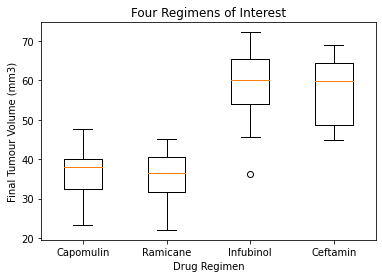

In [1563]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

final_tumor = mouse_study_data_clean.groupby(["Mouse ID"]).max()
final_tumor = final_tumor.reset_index()
final_tumor

merged_df = final_tumor[['Mouse ID','Timepoint']].merge(mouse_study_data_clean,on=['Mouse ID','Timepoint'],how="left")

regimen1 = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]['Tumour Volume (mm3)']
regimen2 = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]['Tumour Volume (mm3)']
regimen3 = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]['Tumour Volume (mm3)']
regimen4 = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]['Tumour Volume (mm3)']

data = [regimen1, regimen2, regimen3, regimen4]

fig1, ax1 = plt.subplots()
ax1.set_title('Four Regimens of Interest')
ax1.boxplot(data)

ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumour Volume (mm3)")
ax1.set_xticklabels(regimens)

## Line and Scatter Plots

Text(0, 0.5, 'Days')

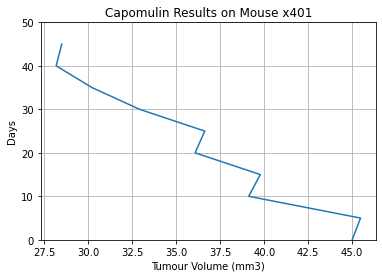

In [1564]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

x401 = mouse_study_data_clean.loc[mouse_study_data_clean['Mouse ID'] == 'x401', ['Tumour Volume (mm3)','Timepoint']]
x401 = x401.set_index('Tumour Volume (mm3)')

x401_tumor = x401['Timepoint']

plot_x401 = x401_tumor.plot.line(title='Capomulin Results on Mouse x401', grid=True, ylim=(0,50))
plot_x401.set_xlabel('Tumour Volume (mm3)')
plot_x401.set_ylabel('Days')

Text(0.5, 1.0, 'Capomulin: Average Tumour Volume vs. Mouse Weight')

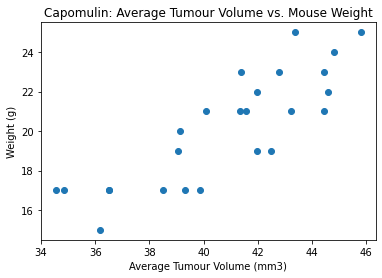

In [1565]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_data = mouse_study_data_clean.loc[mouse_study_data_clean['Drug Regimen'] == 'Capomulin', 
                               ['Mouse ID','Tumour Volume (mm3)','Weight (g)']]

avg_tumor = capomulin_data.groupby('Mouse ID')['Tumour Volume (mm3)'].mean()
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


avg_tumor_data = pd.DataFrame({'avg volume': avg_tumor, 'weight': weight})

y = avg_tumor_data['weight']
x = avg_tumor_data['avg volume']

plt.scatter(x,y)

plt.ylabel('Weight (g)')
plt.xlabel('Average Tumour Volume (mm3)')
plt.title('Capomulin: Average Tumour Volume vs. Mouse Weight')

## Correlation and Regression

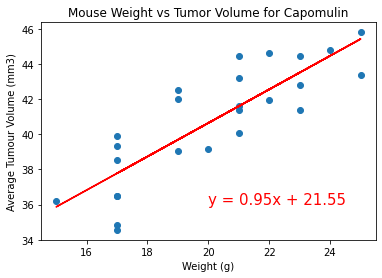


The correlation coefficient is 0.84.



In [1566]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
from scipy.stats import linregress

x = avg_tumor_data['weight']
y = avg_tumor_data['avg volume']

correlation = st.pearsonr(x,y)
correlation


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume for Capomulin')
plt.show()

print(f'''
The correlation coefficient is {round(correlation[0],2)}.
''')
